### RED-WINE QUALITY PREDICTION

STEP-01 IMPORTING OF LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

STEP-02 IMPORTING OF DATA FILES

In [2]:
df = pd.read_csv('winequality_red.csv')

In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.duplicated().sum()

240

In [6]:
df = df.drop_duplicates()

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


DEFINING OF FEATURES & VARIABLES

In [9]:
X = df.drop(columns='quality')
y = df['quality']

In [10]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [11]:
y

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64

In [12]:
df['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

SAMPLING

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
X.shape, X_train.shape, X_test.shape,y.shape,y_train.shape,y_test.shape

((1359, 11), (1087, 11), (272, 11), (1359,), (1087,), (272,))

MODEL FITTING

In [16]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

ACCURACY SCORE PREDICTION [TRAIN DATA]

In [18]:
# accuracy on training data
y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print(training_data_accuracy)

1.0


In [19]:
print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

Accuracy on Training data :  100.0 %


CONFUSION MATRIX TABLE

In [22]:
cf_matrix = confusion_matrix(y_train,y_train_prediction)

print(cf_matrix)

[[  8   0   0   0   0   0]
 [  0  42   0   0   0   0]
 [  0   0 461   0   0   0]
 [  0   0   0 428   0   0]
 [  0   0   0   0 134   0]
 [  0   0   0   0   0  14]]


<Axes: >

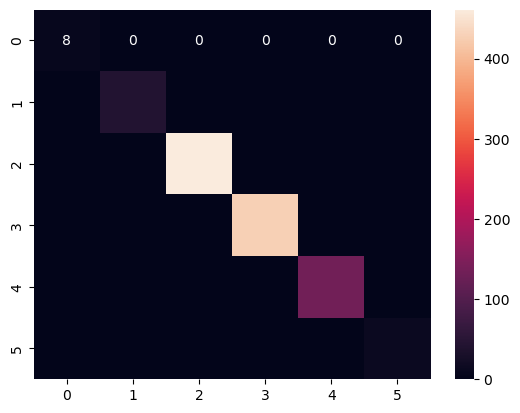

In [23]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

ACCURACY SCORE PREDICTION [TEST]

In [26]:
# accuracy on training data
y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_test_prediction)
print(test_data_accuracy)

0.625


In [27]:
print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')

Accuracy on Test data :  62.5 %


CONFUSION MATRIX TABLE

In [28]:
cf_matrix = confusion_matrix(y_test,y_test_prediction)

print(cf_matrix)

[[ 0  1  1  0  0  0]
 [ 0  0  8  3  0  0]
 [ 0  1 84 29  2  0]
 [ 0  0 25 74  8  0]
 [ 0  0  4 16 12  1]
 [ 0  0  0  2  1  0]]


<Axes: >

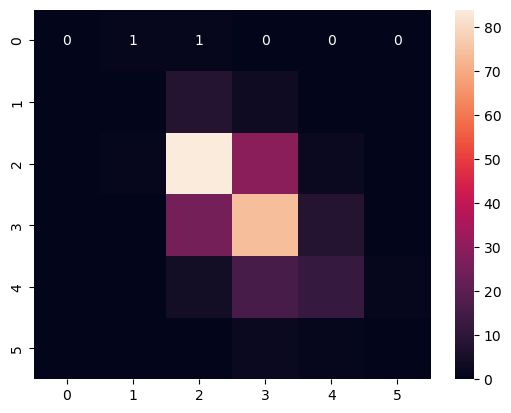

In [29]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

CLASSIFICATION REPORT FOR TRAIN DATA

In [31]:
print(classification_report(y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00       461
           6       1.00      1.00      1.00       428
           7       1.00      1.00      1.00       134
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1087
   macro avg       1.00      1.00      1.00      1087
weighted avg       1.00      1.00      1.00      1087



CLASSIFICATION REPORT FOR TEST DATA

In [32]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.69      0.72      0.71       116
           6       0.60      0.69      0.64       107
           7       0.52      0.36      0.43        33
           8       0.00      0.00      0.00         3

    accuracy                           0.62       272
   macro avg       0.30      0.30      0.30       272
weighted avg       0.59      0.62      0.61       272



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the above study we come to the conlusion that accuracy score is 62% . 5-is most used  among all quality

***************************************************DONE*********************************************